# **Predicting the stage of Alzheimer from the image -**

This project is made as a part of Jovian's "Deep Learning with PyTorch: Zero to GANs". This model is used for predicting the stage of the Alzheimer the patient is going through -

In [158]:
from fastai.vision.all import *
import os
import PIL
import numpy as np
import pandas as pd

In [159]:
# Project name used for jovian.commit
project_name = 'course-project'

In [160]:
!pip install jovian --upgrade --quiet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [161]:
import jovian

In [162]:
jovian.commit(project='course-project', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/course-project


<IPython.core.display.Javascript object>

# Downloading the dataset -

#### The link to the dataset is - [Alzheimer Dataset](http://https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images)

In [163]:
dataset_url = "(http://https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images)"

download_url(dataset_url, '.')

In [164]:
data_dir = '../input/alzheimers-dataset-4-class-of-images'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/Alzheimer_s Dataset")
print(classes)

['Alzheimer_s Dataset']
['test', 'train']


#### Now, let us define the batch zixe and image size

In [165]:
batch_size = 64
image_size = 184

In [166]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/course-project


<IPython.core.display.Javascript object>

# Building the base and training the model- 

We will now be creating a subfolder name subf,where we will store all our files using get_image_files

In [167]:
subf = get_image_files(data_dir)

In [168]:
## creating an empty DataBlock object
dblock = DataBlock()

## converting the DataBlocks to DataSets
dsets = dblock.datasets(subf)

Now we will breakibg down the condition Label and try to rename them, which would be understandable by everyone!

In [169]:
condition_dict = dict(
    MildDemented='Mild one',
    ModerateDemented='Moderate stage',
    NonDemented='No sign of Alzheimer',
    VeryMildDemented='Very mild'
)

In [170]:
def label_func(subf):
    return condition_dict[parent_label(subf)]

As you can see, the stages of Alzheimer or rather the condition has been modifed from small cheat codes to understandble lables.

In [171]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter())

dsets = dblock.datasets(data_dir)
dsets.train[0]

(PILImage mode=RGB size=176x208, TensorCategory(1))

In [172]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

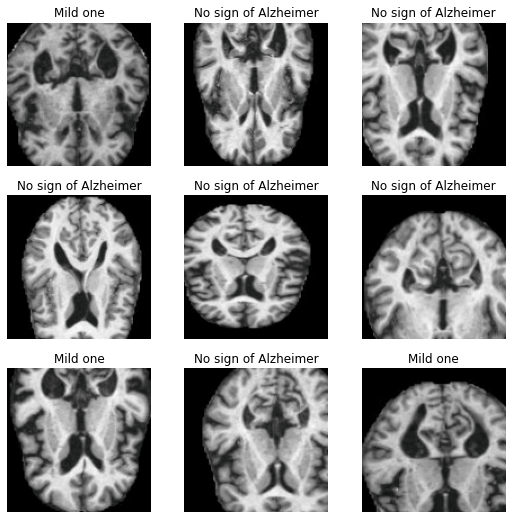

In [173]:
dls = dblock.dataloaders(data_dir)
dls.show_batch()


So, we get proper idea of which type of xray images represnts which stage and how critical the situation is .

Now, trying to load the images data wise in a batch -

In [174]:
data = ImageDataLoaders.from_folder(data_dir, valid_pct=0.15,size = image_size,batch_size =  batch_size)

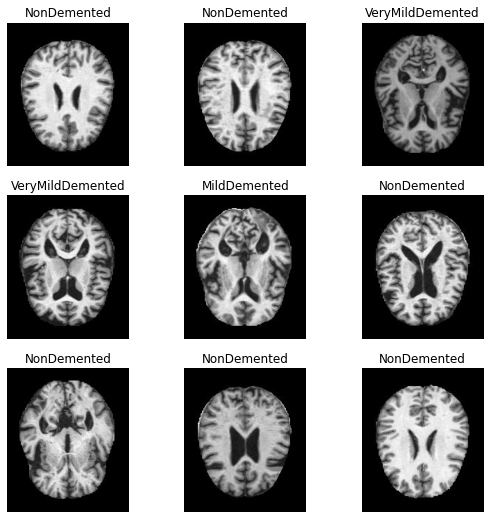

In [175]:
data.show_batch()

Now, let us train our model -

In [176]:
%%time
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(12)

epoch,train_loss,valid_loss,error_rate,time
0,1.683332,1.008359,0.401042,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.886448,0.526752,0.200000,00:16
1,0.478344,0.578628,0.191667,00:17
2,0.339895,0.390433,0.137500,00:17
3,0.208435,0.403047,0.126042,00:16
4,0.116100,0.177744,0.058333,00:16
5,0.084912,0.161535,0.044792,00:17
6,0.058948,0.225258,0.061458,00:17
7,0.032427,0.065985,0.023958,00:16
8,0.013678,0.045845,0.017708,00:18
9,0.005697,0.053723,0.014583,00:16


CPU times: user 2min 13s, sys: 18.8 s, total: 2min 32s
Wall time: 3min 40s


The model was trained for 12 epochs to minimise the error rate in our model, so that it can give the best possible result!

The wall time here represnts the time taken to complete the whole process of training.

# Predicting -

Let's try to make a prediction by picking a random image from our Kaggle dataset, for which we have simple copied the path of the image, that we want to use for prediction

--> The very first image has been taken randomly from google to test our model on it, here is link to the image that is used - [First image](http://https://www.google.com/url?sa=i&url=https%3A%2F%2Foryon.co.uk%2Fblog%2Fa-growing-use-for-mri-in-mental-health%2F&psig=AOvVaw3ACEKWzkcJDjQOk48PD4KM&ust=1610223123202000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCNCPr-KSje4CFQAAAAAdAAAAABAE)

--> The secon dimage has been experimented from a totally different kaggle dataset, that was used for verifying tumour present in human body, which is again used for detecting alzheimer for the same patient through our model- [Kaggle dataset for MRI scan images of tumours](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection)

Text(0.5, 1.0, 'Prediction : MildDemented\nAccuracy : 91.84 %')

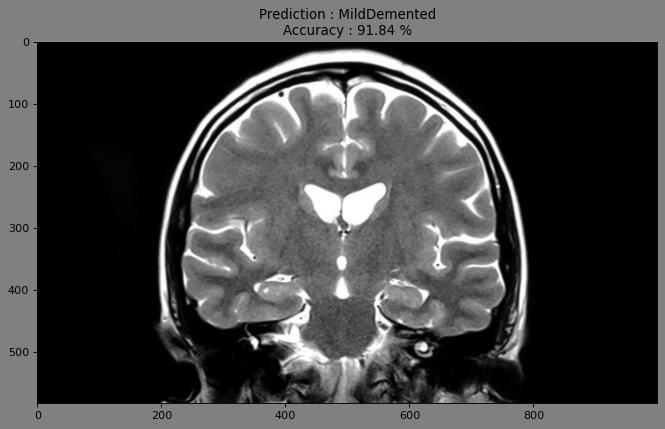

In [177]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num="Alzheimer Stage Prediction", figsize=(10, 10), dpi=80, facecolor='grey')
path = '../input/sample1/Brain-MRI-e1565353833878.jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

Here the result shows, that the image is Mid Dormented, means the person is not suffering from Alzheimer, with accuracy of 91.84%

Text(0.5, 1.0, 'Prediction : MildDemented\nAccuracy : 93.84 %')

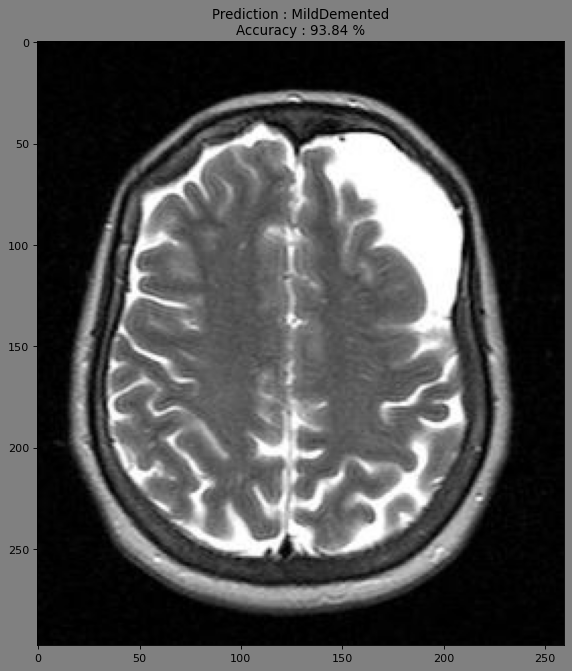

In [181]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='grey')
path = '../input/brain-mri-images-for-brain-tumor-detection/yes/Y115.JPG'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

We again predict an x-ray image of a patient having tumour, who shows very mild condition of alzheimer with accuracy of 93.84%!

In [182]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/course-project


<IPython.core.display.Javascript object>

# Summary and refference - 

This was a model, made for detecting the stages of an Alzheimer patient, with atleast 91-94% accuracy by far.

I have been through many such projects before making this project myself and they are -

[Natural Images-Tensorflow(99% Accuracy)](http://https://www.kaggle.com/vkrm0230/natural-images-tensorflow-99-accuracy)

[Natural Images-Tensorflow(99% Accuracy)](http://https://www.kaggle.com/yash92328/object-detection-95)

[Alzheimers Disease Severity Classification](http://https://www.kaggle.com/sayantanmukh/alzheimers-disease-severity-classification)

[🔥💧 Fire/Water Pokémon Classification](http://https://www.kaggle.com/gcdatkin/fire-water-pok-mon-classification)

This were some of the above notebooks that you must look into if you are a beginner in making a Deep Learning project!

In [183]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/sathi-satb/course-project


<IPython.core.display.Javascript object>